In [1]:
import os

os.chdir('/mnt/jw01-aruk-home01/projects/ra_challenge/RA_challenge/michael_dev/RA2_alpine_lads/ra_joint_predictions')

In [2]:
from utils.config import Config

config = Config()

In [11]:
from dream.prediction import predict_dream_test_set

predict_params = {
        'hands_joint_source': './data/predictions/hand_joint_data_test.csv',
        'feet_joint_source': './data/predictions/feet_joint_data_test.csv',
        'hands_narrowing_model': '../trained_models/adam_adapted_weights/hands_narrowing_adam_adapted_weights_val.h5',
        'wrists_narrowing_model': '../trained_models/adam_adapted_weights/wrists_narrowing_adam_adapted_weights_val.h5',
        'feet_narrowing_model': '../trained_models/adam_adapted_weights/feet_narrowing_adam_adapted_weights_val.h5',
        'hands_erosion_model': '../trained_models/adam_adapted_weights/hands_erosion_adam_adapted_weights_val.h5',
        'wrists_erosion_model': '../trained_models/adam_adapted_weights/wrists_erosion_adam_adapted_weights_val.h5',
        'feet_erosion_model': '../trained_models/adam_adapted_weights/feet_erosion_adam_adapted_weights_val.h5',
        'template_path': '../resources/template.csv',
        'output_path': '../trained_models/adam_adapted_weights_val_output.csv',
    }

predict_dream_test_set(config, predict_params)

In [12]:
import pandas as pd

v1 = pd.read_csv('../trained_models/output_v1_val.csv')
truth = pd.read_csv(config.train_location + '/training.csv')
adam_adapted_weights = pd.read_csv('../trained_models/adam_adapted_weights_val_output.csv')

adam_no_weigths_output = pd.read_csv('../trained_models/adam_no_weights_val_output.csv')

In [18]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import r2_score

def print_report(truth, submitted_version, new_version):
    previos = submitted_version.merge(truth, how = 'inner', on  = 'Patient_ID')
    new = new_version.merge(truth, how = 'inner', on  = 'Patient_ID')

    print('Previous R2:', r2_score(previos['Overall_Tol_y'], previos['Overall_Tol_x']))
    print('New R2:', r2_score(new['Overall_Tol_y'], new['Overall_Tol_x']))
    
    print('Previous Overall MAE:', np.mean(np.absolute(previos['Overall_Tol_x'] - previos['Overall_Tol_y'])))
    print('New Overall MAE:', np.mean(np.absolute(new['Overall_Tol_x'] - new['Overall_Tol_y'])))
    
    plt.figure(figsize = (8, 8))
    plt.scatter(previos['Overall_Tol_y'], previos['Overall_Tol_x'])
    plt.plot([0, 350], [0, 350])
    plt.title('Previous')
    
    plt.figure(figsize = (8, 8))
    plt.scatter(new['Overall_Tol_y'], new['Overall_Tol_x'])
    plt.plot([0, 350], [0, 350])
    plt.title('New')
    
    is_smaller_count = 0
    no_joints = truth.columns[4:].size

    increased = []
    decreased = []

    for column in truth.columns[4:]:
        v1_mae = np.mean(np.absolute(previos[column + '_x'] - previos[column + '_y']))
        adam_adapted_weights_mae = np.mean(np.absolute(new[column + '_x'] - new[column + '_y']))
    
        is_smaller = adam_adapted_weights_mae < v1_mae
    
        if is_smaller:
            is_smaller_count+=1
            decreased.append(adam_adapted_weights_mae - v1_mae)
        else:
            increased.append(adam_adapted_weights_mae - v1_mae)
    
        print(column, '\t\t', v1_mae, '\t', adam_adapted_weights_mae, '\t\t', is_smaller)
    
    improved_ratio = is_smaller_count / no_joints
    
    print(f'Score improved on {is_smaller_count} out of {no_joints} joints ({improved_ratio})')
    print('Mean Score improvement:', np.mean(np.array(decreased)))
    print('Mean Score worsen:', np.mean(np.array(increased)))
    
    plt.figure(figsize = (8, 8))
    plt.hist(decreased)
    plt.title('Decreased Scores')
    plt.figure(figsize = (8, 8))
    plt.hist(increased)
    plt.title('Increased Scores')

Previous R2: 0.6204825976590534
New R2: 0.656442432937707
Previous Overall MAE: 11.660043634382404
New Overall MAE: 11.087545346669708
LH_mcp_E__ip 		 0.06524683304319272 	 0.06660434185663246 		 False
LH_pip_E__2 		 0.10867159503214639 	 0.12112343521496326 		 False
LH_pip_E__3 		 0.19446606163094465 	 0.2112411973782622 		 False
LH_pip_E__4 		 0.14910275586652225 	 0.1984640450528337 		 False
LH_pip_E__5 		 0.07515408313258125 	 0.12068605740522603 		 False
LH_mcp_E__1 		 0.2674289266222902 	 0.2681402067916699 		 False
LH_mcp_E__2 		 0.22328392384362092 	 0.25270826014673603 		 False
LH_mcp_E__3 		 0.21759447449798328 	 0.2755836495278813 		 False
LH_mcp_E__4 		 0.08157544828246902 	 0.11108630600842931 		 False
LH_mcp_E__5 		 0.22288872746519892 	 0.23365673292053532 		 False
LH_wrist_E__mc1 		 0.05441760784337222 	 0.08271012024046043 		 False
LH_wrist_E__mul 		 0.175562653324617 	 0.2027865434521628 		 False
LH_wrist_E__nav 		 0.3143387020382006 	 0.14317792973167592 		 True
LH_w

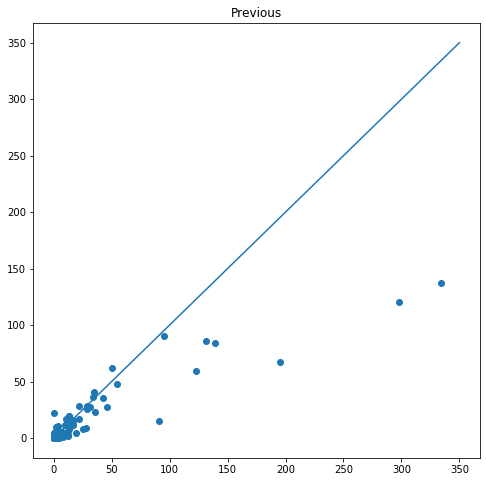

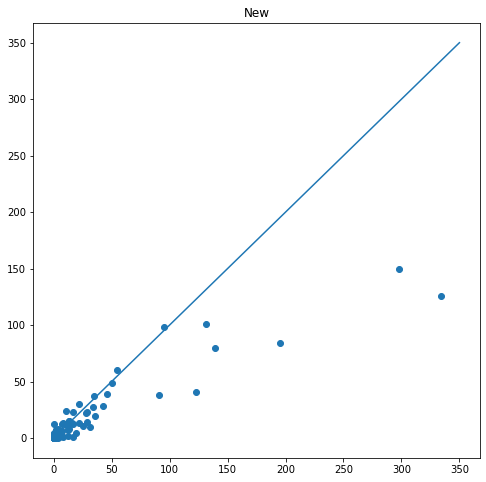

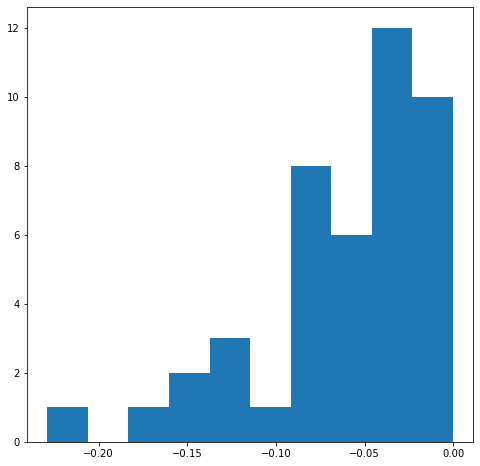

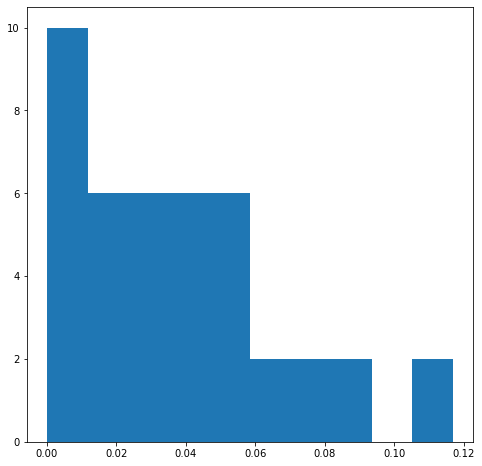

In [19]:
print_report(truth, v1, adam_no_weigths_output)

Previous R2: 0.6204825976590534
New R2: 0.6375285449366929
Previous Overall MAE: 11.660043634382404
New Overall MAE: 12.048951485057616
LH_mcp_E__ip 		 0.06524683304319272 	 0.06565550786957677 		 False
LH_pip_E__2 		 0.10867159503214639 	 0.10881384363687575 		 False
LH_pip_E__3 		 0.19446606163094465 	 0.19135572542478158 		 True
LH_pip_E__4 		 0.14910275586652225 	 0.14654073437684595 		 True
LH_pip_E__5 		 0.07515408313258125 	 0.06670570833429215 		 True
LH_mcp_E__1 		 0.2674289266222902 	 0.24714329249335004 		 True
LH_mcp_E__2 		 0.22328392384362092 	 0.22263387562020776 		 True
LH_mcp_E__3 		 0.21759447449798328 	 0.22548184213705658 		 False
LH_mcp_E__4 		 0.08157544828246902 	 0.1174747443062407 		 False
LH_mcp_E__5 		 0.22288872746519892 	 0.209239279628028 		 True
LH_wrist_E__mc1 		 0.05441760784337222 	 0.06574403321920406 		 False
LH_wrist_E__mul 		 0.175562653324617 	 0.19380900621355557 		 False
LH_wrist_E__nav 		 0.3143387020382006 	 0.24524101958940508 		 True
LH_wris

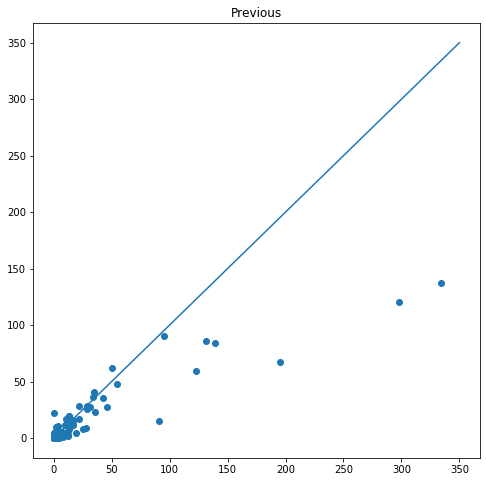

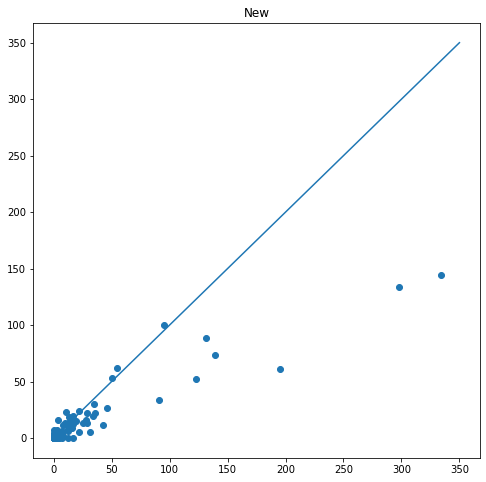

In [15]:
print_report(truth, v1, adam_adapted_weights)

In [19]:
v1 = output.merge(truth, how = 'inner', on  = 'Patient_ID')
adam_adapted_weights = new_output.merge(truth, how = 'inner', on  = 'Patient_ID')

In [33]:
train_data_mask = [patient_id not in v1['Patient_ID'] for patient_id in truth['Patient_ID']]

train_data = truth.iloc[train_data_mask]

In [35]:
mean_tol = np.mean(train_data['Overall_Tol'])

In [39]:
from sklearn.metrics import r2_score

r2_score(v1['Overall_Tol_y'], v1['Overall_Tol_x'])

0.6204825976590534

In [40]:
r2_score(adam_adapted_weights['Overall_Tol_y'], adam_adapted_weights['Overall_Tol_x'])

0.6375285449366929

In [41]:
import numpy as np

np.mean(np.absolute(adam_adapted_weights['Overall_Tol_x'] - adam_adapted_weights['Overall_Tol_y']))

12.048951485057616

In [42]:
np.mean(np.absolute(v1['Overall_Tol_x'] - v1['Overall_Tol_y']))

11.660043634382404

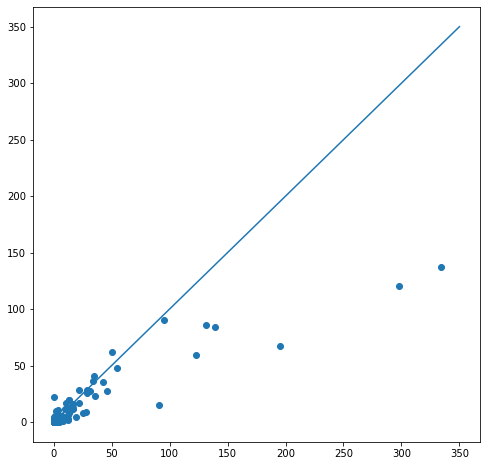

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))
plt.scatter(v1['Overall_Tol_y'], v1['Overall_Tol_x'])
plt.plot([0, 350], [0, 350])

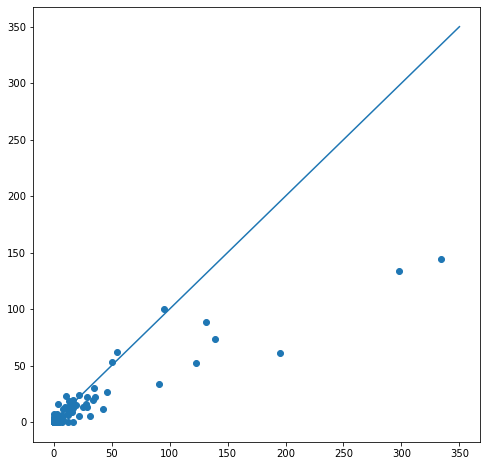

In [23]:
plt.figure(figsize = (8, 8))
plt.scatter(adam_adapted_weights['Overall_Tol_y'], adam_adapted_weights['Overall_Tol_x'])
plt.plot([0, 350], [0, 350])

In [32]:
is_smaller_count = 0
no_joints = truth.columns[4:].size

increased = []
decreased = []

for column in truth.columns[4:]:
    v1_mae = np.mean(np.absolute(v1[column + '_x'] - v1[column + '_y']))
    adam_adapted_weights_mae = np.mean(np.absolute(adam_adapted_weights[column + '_x'] - adam_adapted_weights[column + '_y']))
    
    is_smaller = adam_adapted_weights_mae < v1_mae
    
    if is_smaller:
        is_smaller_count+=1
        decreased.append(adam_adapted_weights_mae - v1_mae)
    else:
        increased.append(adam_adapted_weights_mae - v1_mae)
    
    print(column, '\t\t', v1_mae, '\t', adam_adapted_weights_mae, '\t\t', is_smaller)
    
improved_ratio = is_smaller_count / no_joints
    
print(f'Score improved on {is_smaller_count} out of {no_joints} joints ({improved_ratio})')
print('Mean Score improvement:', np.mean(np.array(decreased)))
print('Mean Score worsen:', np.mean(np.array(increased)))

LH_mcp_E__ip 		 0.06524683304319272 	 0.06565550786957677 		 False
LH_pip_E__2 		 0.10867159503214639 	 0.10881384363687575 		 False
LH_pip_E__3 		 0.19446606163094465 	 0.19135572542478158 		 True
LH_pip_E__4 		 0.14910275586652225 	 0.14654073437684595 		 True
LH_pip_E__5 		 0.07515408313258125 	 0.06670570833429215 		 True
LH_mcp_E__1 		 0.2674289266222902 	 0.24714329249335004 		 True
LH_mcp_E__2 		 0.22328392384362092 	 0.22263387562020776 		 True
LH_mcp_E__3 		 0.21759447449798328 	 0.22548184213705658 		 False
LH_mcp_E__4 		 0.08157544828246902 	 0.1174747443062407 		 False
LH_mcp_E__5 		 0.22288872746519892 	 0.209239279628028 		 True
LH_wrist_E__mc1 		 0.05441760784337222 	 0.06574403321920406 		 False
LH_wrist_E__mul 		 0.175562653324617 	 0.19380900621355557 		 False
LH_wrist_E__nav 		 0.3143387020382006 	 0.24524101958940508 		 True
LH_wrist_E__lunate 		 0.2677663260644272 	 0.20181529850215457 		 True
LH_wrist_E__radius 		 0.20881298570668574 	 0.17879359195011504 		 True
